# Use K-Nearest Neighbors (KNN), Random Forests, Suport Vector Machines (SVM), Neural Networks (NN) to model breast cancer data

## 1. KNN

In [1]:
# import required modules
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
cancer = load_breast_cancer()
print cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [3]:
# showing the first 5 data
print cancer.data.shape
print cancer.data[0:6]
print cancer.target[0:6]

(569, 30)
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
    2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
    1.23800000e-01   1.86600000e-01   2.416

Best n:  9
Score:  0.968449403617


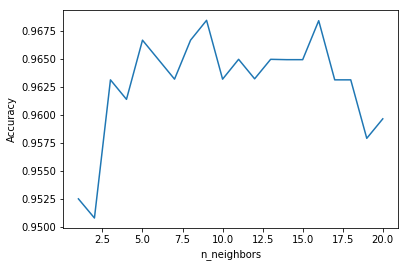

In [4]:
# use minmaxscaler to scale each feature from 0 to 1
X_scaler = preprocessing.MinMaxScaler().fit_transform(cancer.data)

# perform KNN Classifier
accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1, 21)
best_score = 0
best_n = 0
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(clf, X_scaler, cancer.target, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    accuracy.append(score)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_n = n_neighbors
        
print "Best n: ", best_n
print "Score: ", best_score
# plot results
plt.plot(neighbors_settings, accuracy)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [5]:
# rebuild a model on the n
clf = KNeighborsClassifier(n_neighbors=best_n)
clf.fit(X_scaler, cancer.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

## 2. Random Forests (Decision Trees)

Best n:  23
Score:  0.965032704886


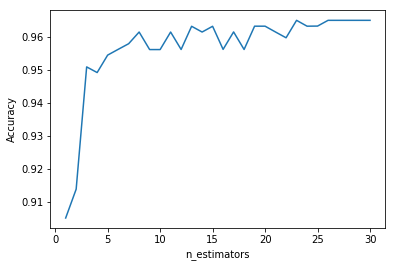

In [6]:
# import required modules
#from sklearn.datasets import load_breast_cancer
#from sklearn import preprocessing
#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# use minmaxscaler to scale each feature from 0 to 1
X_scaler = preprocessing.MinMaxScaler().fit_transform(cancer.data)

# perform Random forests Classifier
accuracy = []

# try n_estimators from 1 to 30
estimators_settings = range(1, 31)
best_score = 0
best_n = 0
for n_estimators in estimators_settings:
    # build the model
    forest = RandomForestClassifier(n_estimators=n_estimators, max_features="sqrt", random_state=0)
    scores = cross_val_score(forest, X_scaler, cancer.target, cv=5)
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    accuracy.append(score)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_n = n_estimators
        
print "Best n: ", best_n
print "Score: ", best_score
# plot results
plt.plot(estimators_settings, accuracy)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

In [7]:
# rebuild a model on the n
forest = RandomForestClassifier(n_estimators=best_n, max_features="sqrt", random_state=0)
forest.fit(X_scaler, cancer.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## 3. SVM

In [8]:
# import required modules
#from sklearn.datasets import load_breast_cancer
#from sklearn import preprocessing
#from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#import matplotlib.pyplot as plt
#%matplotlib inline

In [9]:
# load data
cancer = load_breast_cancer()

# use minmaxscaler to scale each feature from 0 to 1
X_scaler = preprocessing.MinMaxScaler().fit_transform(cancer.data)

# perform SVM Classifier with grid-search and cross-validation
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_scaler, cancer.target, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print "best parameters: ", best_parameters
print "best score: ", best_score

best parameters:  {'C': 10, 'gamma': 1}
best score:  0.978945748365


In [10]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_scaler, cancer.target)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 4. NN

In [11]:
# import required modules
#from sklearn.datasets import load_breast_cancer
#from sklearn import preprocessing
#from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

#import matplotlib.pyplot as plt
#%matplotlib inline

In [12]:
# load data
cancer = load_breast_cancer()

# use minmaxscaler to scale each feature from 0 to 1
X_scaler = preprocessing.MinMaxScaler().fit_transform(cancer.data)

# perform 2 layers NN Classifier with grid-search (layers size, alpha) and cross-validation
best_score = 0
for size in [5, 10, 20, 30]:
    for alpha in [0.1, 0.5, 1]:
        # for each combination of parameters, train an SVC
        nn = MLPClassifier(solver='lbfgs', activation='logistic', alpha=alpha, hidden_layer_sizes=[size,size], random_state=0)
        # perform cross-validation
        scores = cross_val_score(nn, X_scaler, cancer.target, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'size': size, 'alpha': alpha}

print "best parameters: ", best_parameters
print "best score: ", best_score

best parameters:  {'alpha': 0.5, 'size': 5}
best score:  0.978914967295


In [13]:
# rebuild a model on the combined training and validation set
nn = MLPClassifier(solver='lbfgs', activation='logistic', alpha=best_parameters['alpha'], hidden_layer_sizes=[best_parameters['size'],best_parameters['size']], random_state=0)
nn.fit(X_scaler, cancer.target)

MLPClassifier(activation='logistic', alpha=0.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[5, 5], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)